<a href="https://colab.research.google.com/github/kumarsinghashu/Zomato-Restaurant-Clustering-and-Sentiment-Analysis./blob/main/Zomato_Restaurant_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size='8px'><font color='red'>**Project Name**    - <font color='darkturquoise'>Zomato Restaurant Clustering and Sentiment Analysis






##### <font size='5px'>**Project Type**    - **UnSupervised Machine Learning**
##### **Contribution**    - Individual

##### **Name**    - Ashutosh Kumar Singh

# **Project Summary -**

Founded in 2008 by Deepinder Goyal and Pankaj Chaddah, Zomato is an Indian restaurant aggregator and food delivery startup. Zomato offers comprehensive details, menus, and user reviews of restaurants, along with food delivery services from partnered restaurants available in specific cities.

India, renowned for its richly diverse multi-cuisine offerings across numerous restaurants and hotel resorts, exemplifies unity in diversity. The restaurant industry in India continually evolves, witnessing increased acceptance among Indians for restaurant dining experiences or food delivery services. The burgeoning presence of restaurants in every state across India has prompted an investigation into data analysis to uncover insights, intriguing statistics, and facts about the country's food industry within each city. Thus, this project aims to analyze Zomato's restaurant data specifically for every city in India.

Two distinct files are provided, each with self-explanatory columns. Here's a concise overview:

Restaurant names and Metadata - This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis Restaurant reviews - Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.


Steps that are performed:

* Importing libraries
* Loading the dataset
* Shape of dataset
* Dataset information
* Handling the duplicate values
* Handling missing values.
* Undeerstanding the columns
* Variable description
* Data wrangling
* Data visualization
* Story telling and experimenting with charts.
* Text preprocessing,
* Latent Direchlet Allocation
* Sentiment analysis
* Challenges faced
* Conclusion.

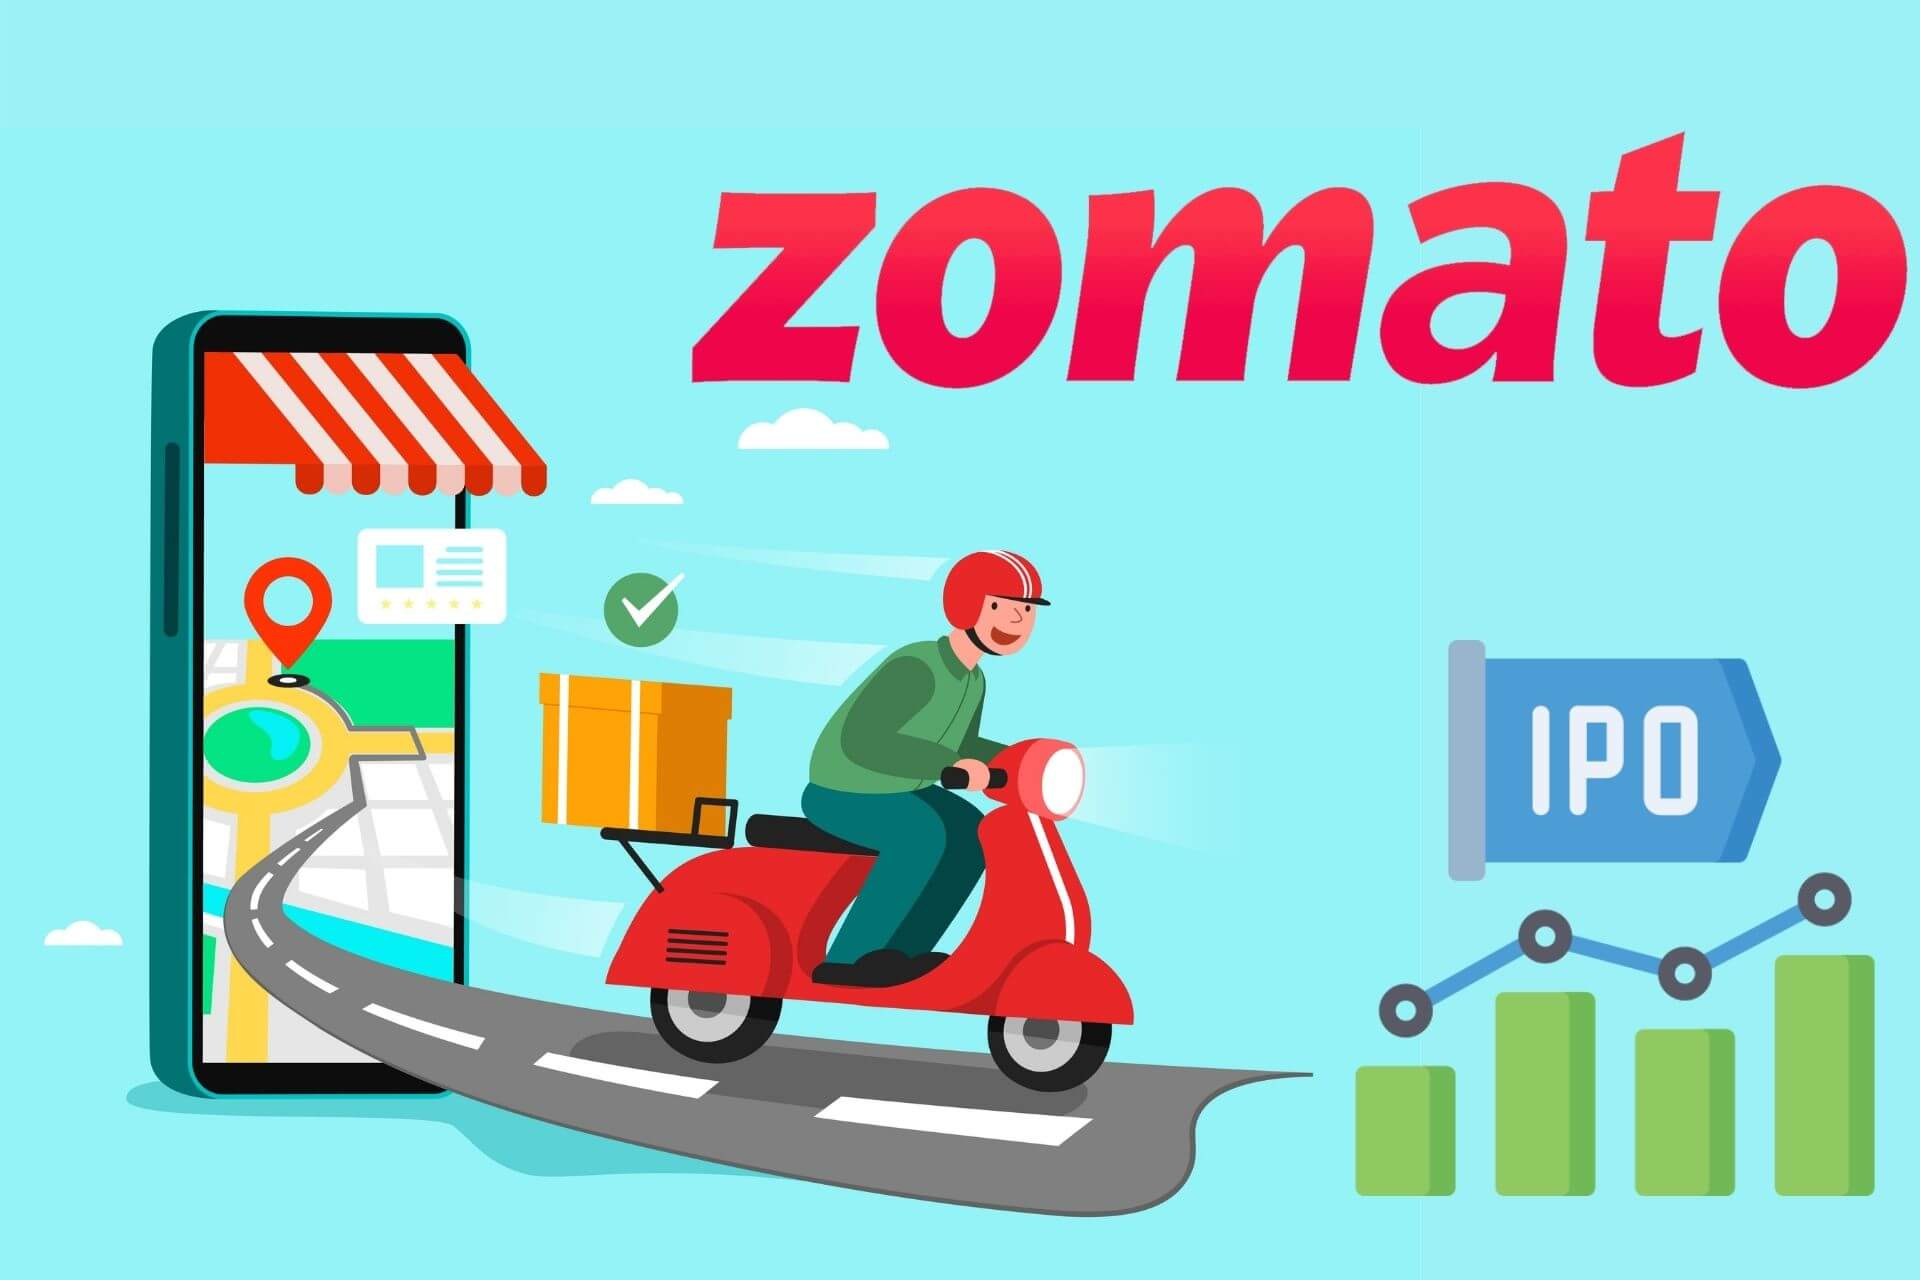

# **Problem Statement**


The problem statement for this project is to analyze and understand the restaurant industry in India by utilizing data from the Indian restaurant aggregator and food delivery start-up, Zomato. The project aims to gain insights into the sentiments of customer reviews, cluster Zomato restaurants into different segments, and analyze the data to make useful conclusions in the form of visualizations. The data analyzed includes information on cuisine, costing, and customer reviews. The project aims to assist customers in finding the best restaurant in their locality and aid the company in identifying areas for growth and improvement in the industry. Additionally, the project aims to use the data for sentiment analysis and identifying critics in the industry through the metadata of reviewers.

## ***1. Know Your Data***

# ***Let's Begin !***

In [1]:
# Import Libraries and modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from textblob import TextBlob
from IPython.display import Image
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
import gensim

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importing dataset.
meta_df = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant Clustering And Sentiment Analysis/Zomato Restaurant names and Metadata.csv')

#First View of Dataset

In [4]:
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count.

print(f' We have total {meta_df.shape[0]} rows and {meta_df.shape[1]} columns.')

 We have total 105 rows and 6 columns.


In [6]:
# Dataset Info.

meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count.

meta_df.duplicated(keep='last').sum()

0

In [8]:
# Resting Index.

meta_df.reset_index(inplace=True)

In [9]:
# Checking duplicate restaurant name.

meta_df['Name'].duplicated().sum()

0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count.

meta_df.isnull().sum()

index           0
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [11]:
# Checking for Null values.

meta_df[meta_df['Collections'].isnull()].head()

,index,Name,Links,Cost,Collections,Cuisines,Timings
7,7,Shah Ghouse Spl Shawarma,https://www.zomato.com/hyderabad/shah-ghouse-s...,300,NaN,Lebanese,12 Noon to 12 Midnight
15,15,KFC,https://www.zomato.com/hyderabad/kfc-gachibowli,500,NaN,"Burger, Fast Food",11 AM to 11 PM
16,16,NorFest - The Dhaba,https://www.zomato.com/hyderabad/norfest-the-d...,550,NaN,North Indian,12 Noon to 10:30 PM
17,17,Hotel Zara Hi-Fi,https://www.zomato.com/hyderabad/hotel-zara-ga...,400,NaN,"Chinese, North Indian",11:30 AM to 1 AM
23,23,Amul,https://www.zomato.com/hyderabad/amul-gachibowli,150,NaN,"Ice Cream, Desserts",10 AM to 5 AM


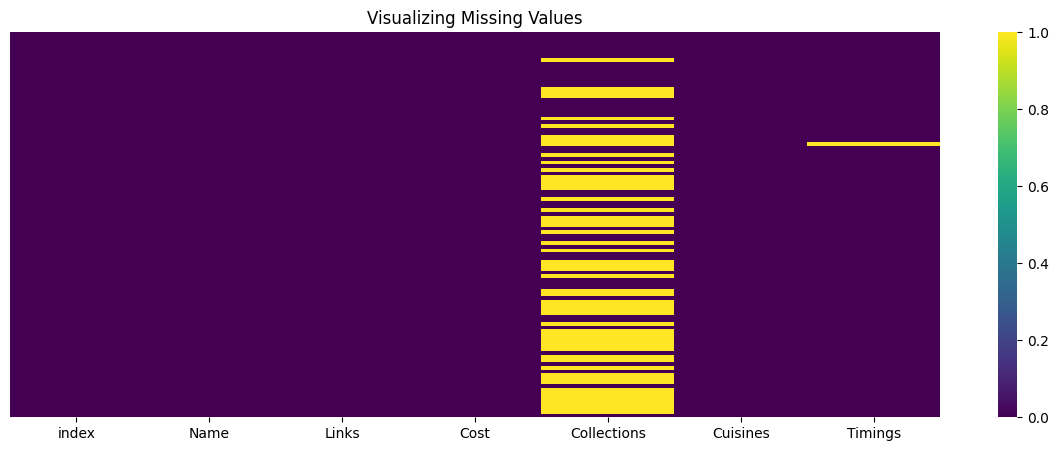

In [12]:
#Visualizing the Presence of Missing Data
plt.figure(figsize=(15, 5))
sns.heatmap(meta_df.isnull(), cmap='viridis', annot=False, yticklabels=False)
plt.title("Visualizing Missing Values")
plt.show()


### What information do you possess regarding your dataset?

Our dataset exhibits missing values within the 'collection' column, which contains sentiment-related data, therefore, there's no necessity to impute these null values.

- There are a total of 105 observations encompassing 6 distinct features.
- The 'collection' and 'timing' features contain null values.
- All 105 records are unique; there are no duplicate entries.
- The 'cost' feature denotes amounts but is represented as an object due to comma separation within the values.
- 'Timing' represents operational hours and is stored as object data, likely in text format.

#<b/>2. Understanding Variables</b>

In [13]:
# Dataset Columns.

meta_df.columns

Index(['index', 'Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

<b/>Variables Description</b>

#<b/>Zomato Restaurant names and Metadata</b>

1.Name : Name of Restaurants

2.Links : URL Links of Restaurants

3.Cost : Per person estimated Cost of dining

4.Collection : Tagging of Restaurants w.r.t. Zomato categories

5.Cuisines : Cuisines served by Restaurants

6.Timings : Restaurant Timings

#<b/>Zomato Restaurant reviews</b>
1.Restaurant : Name of the Restaurant

2.Reviewer : Name of the Reviewer

3.Review : Review Text

4.Rating : Rating Provided by Reviewer

5.MetaData : Reviewer Metadata - No. of Reviews and followers

6.Time: Date and Time of Review

7.Pictures : No. of pictures posted with review

#<b/>3. Data Wrangling</b>

###Data Wrangling Code

In [14]:
# Convert the 'Cost' column, deleting the comma and changing the data type into 'int64'.

meta_df['Cost'] =  meta_df['Cost'].str.replace(",","").astype('int64')

<b/>Convert the 'Cost' column by removing the commas and changing the data type to 'int64'.</b>

In [15]:
# Dataset Info.

meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        105 non-null    int64 
 1   Name         105 non-null    object
 2   Links        105 non-null    object
 3   Cost         105 non-null    int64 
 4   Collections  51 non-null     object
 5   Cuisines     105 non-null    object
 6   Timings      104 non-null    object
dtypes: int64(2), object(5)
memory usage: 5.9+ KB


#<b/>4.Utilize data visualization, storytelling, and experimentation with charts to comprehend and understand the correlations between variables.</b>

###<b/>Chart - 1</b>

In [16]:
# Chart - 1 visualization code.

top10_res_by_cost = meta_df[['Name','Cost']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=False).head(10)

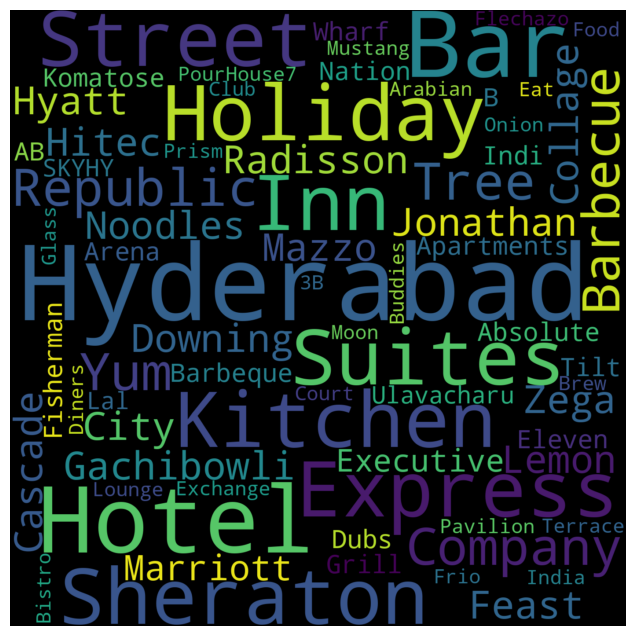

In [17]:
# Creating word cloud for expensive restaurants.
plt.figure(figsize=(15,8))
text = " ".join(name for name in meta_df.sort_values('Cost',ascending=False).Name[:30])

# Creating word_cloud with text as argument in .generate() method.
word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud.
plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off");

#<b/>Chart - 2</b>

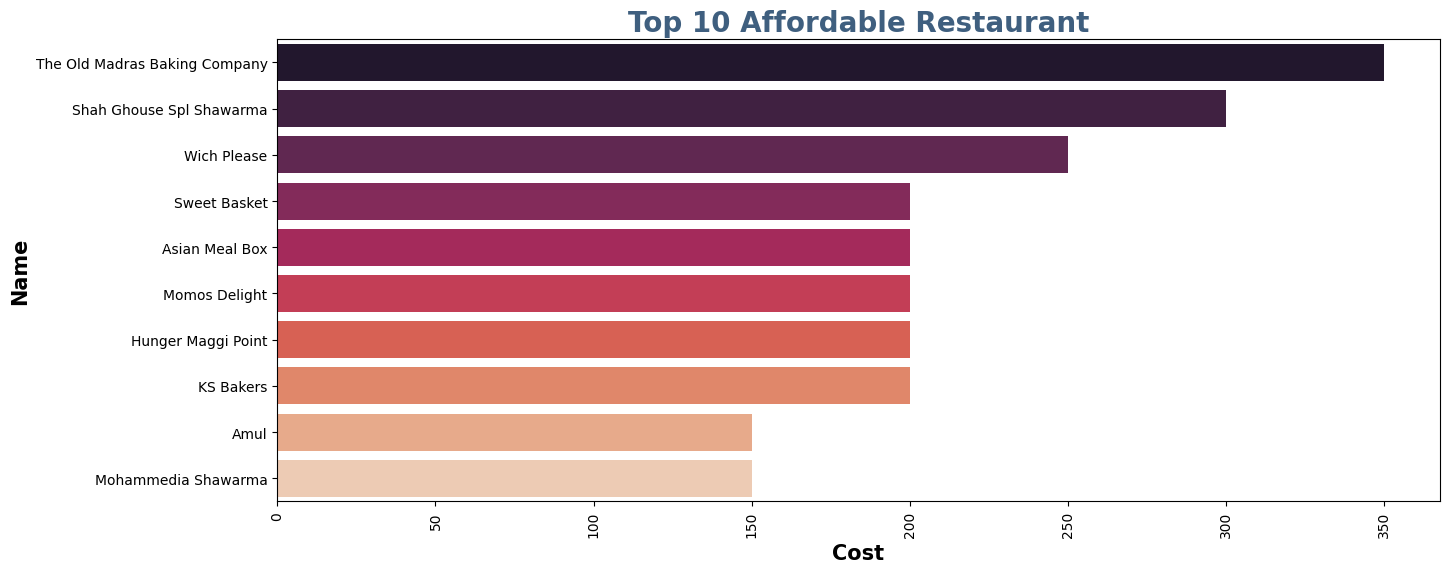

In [18]:
# Affordable price restaurants.

plt.figure(figsize=(15,6))

# Performing groupby To get values accourding to Names and sort it for visualisation.
top_10_affor_rest=meta_df[['Name','Cost']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=False).tail(10)

# Lables for X and Y axis
x = top_10_affor_rest['Cost']
y = top_10_affor_rest['Name']

# Assigning the arguments for chart
plt.title("Top 10 Affordable Restaurant",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rocket')
plt.show()

The plot displays the top 10 affordable restaurants ranked by their total cost. The y-axis indicates the restaurant names, while the x-axis portrays the total cost. The affordable restaurants are arranged in ascending order based on their cost.

#<b/>Chart - 3</b>

<Axes: >

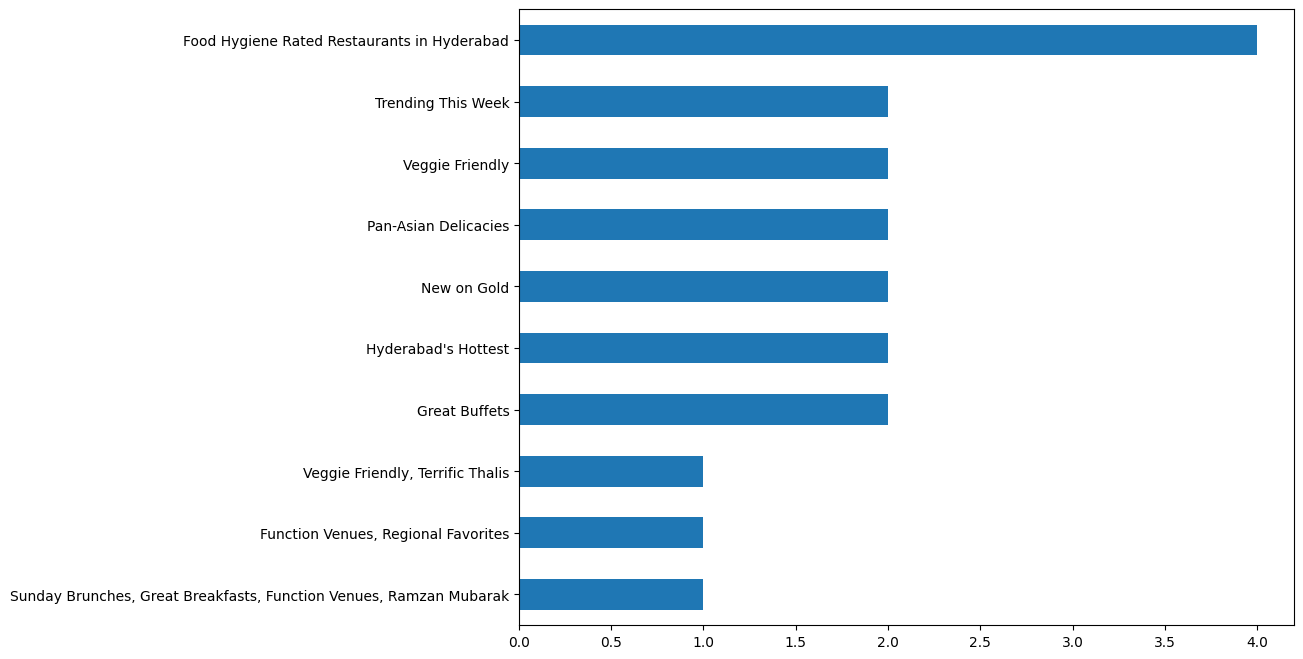

In [19]:
# Visualisation the value counts of collection.
meta_df['Collections'].value_counts()[0:10].sort_values().plot(figsize=(10,8),kind='barh')

<b/>The bar chart illustrates the top 10 most frequent values in the Collections column, depicting their counts on the x-axis and the corresponding values on the y-axis. The horizontal orientation of the bars facilitates straightforward comparison among collection counts, with the length of each bar directly correlating to its count.</b>

#<b/>Text preprocessing for the meta dataset.</b>

To generate a plot displaying cuisines from the dataset, we need to calculate the word frequency (cuisine frequency). This involves several operations such as eliminating stop words, converting all text to lowercase, removing punctuations, eliminating repeated characters, erasing numbers and emojis, and ultimately utilizing count vectorization.

In [20]:
# Downloading and importing the dependancies for text cleaning.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
# Extracting the stopwords from nltk library for English corpus.
sw = stopwords.words('english')

In [22]:
# Creating a function for removing stopwords.
def stopwords(text):
    '''a function for removing the stopword'''

    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in str(text).split() if word.lower() not in sw]

    # joining the list of words with space separator
    return " ".join(text)

In [23]:
# Removing stopwords from Cuisines.
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda text: stopwords(text))
meta_df['Cuisines'].head()

0    chinese, continental, kebab, european, south i...
1                       biryani, north indian, chinese
2         asian, mediterranean, north indian, desserts
3    biryani, north indian, chinese, seafood, bever...
4    asian, continental, north indian, chinese, med...
Name: Cuisines, dtype: object

<b/>The stop words have been successfully eliminated.</b>

In [24]:
# Defining the function for removing punctuation.
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string

    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)

    # return the text stripped of punctuation marks
    return text.translate(translator)

In [25]:
# Removing punctuation from Cuisines.
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: remove_punctuation(x))
meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

<b/>The punctuation marks within the text have been successfully removed.</b>

In [26]:
# Cleaning and removing Numbers.
import re

# Writing a function to remove repeating characters.
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

In [27]:
# Removing repeating characters from Cuisines.
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: cleaning_repeating_char(x))
meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

<b/>The process of eliminating repeated characters has been successfully completed.</b>



In [28]:
# Removing the Numbers from the data.
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [29]:
# Implementing the cleaning.
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: cleaning_numbers(x))
meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

<b/>We dont want numbers in the text Hence removed number successfully</b>

In [30]:
# Top 20 Two word Frequencies of Cuisines.
from collections import Counter
text = ' '.join(meta_df['Cuisines'])

# separating each word from the sentences
words = text.split()

# Extracting the first word from the number for cuisines in the sentence.
two_words = {' '.join(words):n for words,n in Counter(zip(words, words[1:])).items() if not  words[0][-1]==(',')}


In [31]:
# Extracting the most frequent cuisine present in the collection.
# Counting a frequency for cuisines.
two_words_dfc = pd.DataFrame(two_words.items(), columns=['Cuisine Words', 'Frequency'])

# Sorting the most frequent cuisine at the top and order by descending
two_words_dfc = two_words_dfc.sort_values(by = "Frequency", ascending = False)

# selecting first top 20 frequent cuisine.
two_words_20c = two_words_dfc[:20]
two_words_20c

,Cuisine Words,Frequency
6,north indian,61
9,indian chinese,27
42,fast food,15
4,south indian,9
5,indian north,9
33,chinese north,8
24,indian continental,6
65,italian north,6
8,biryani north,6
28,food north,6


#<b/>Chart - 4</b>

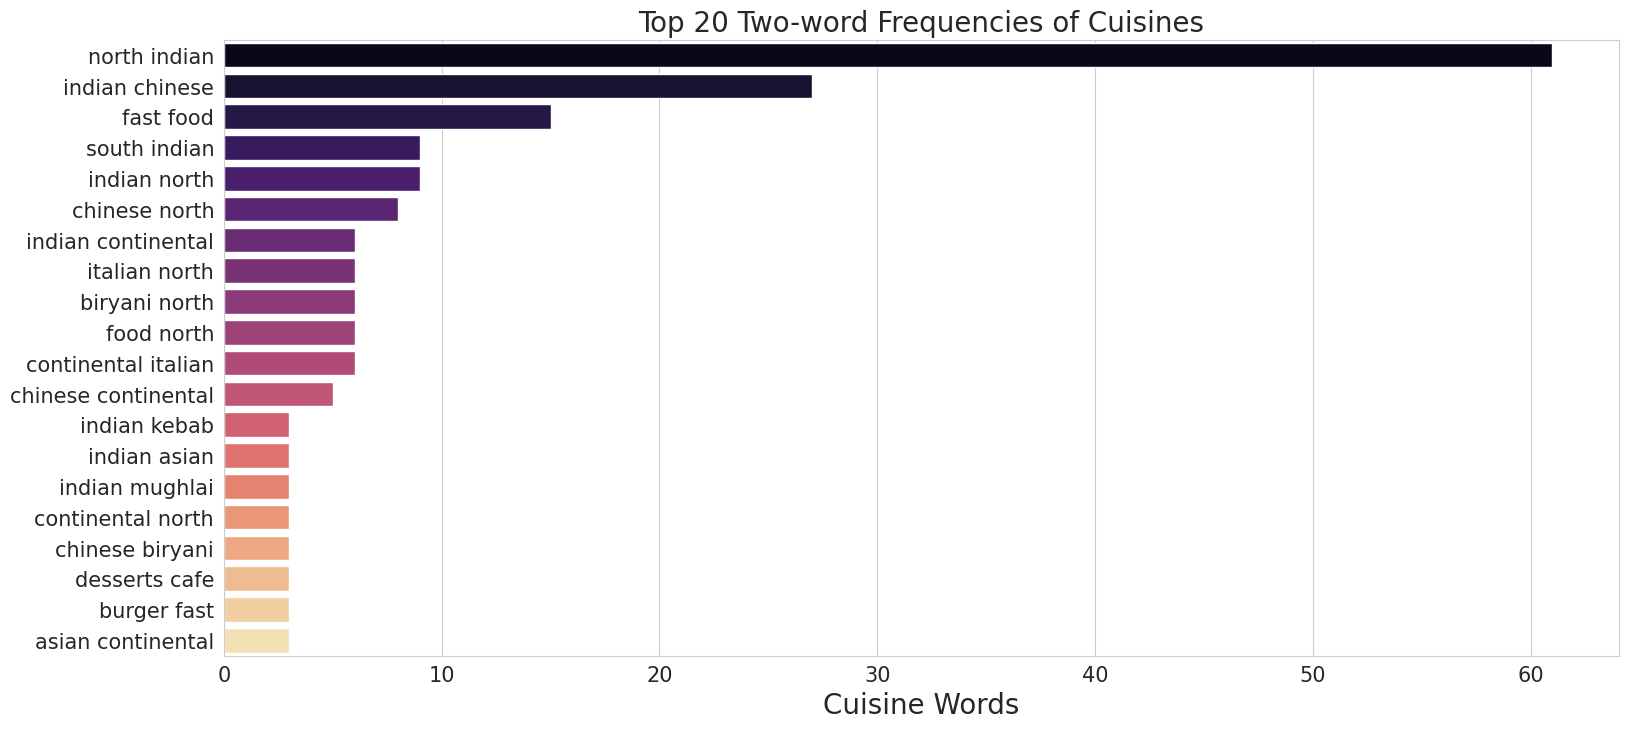

In [32]:
# Visualizing the frequency of the Cuisines.

sns.set_style("whitegrid")
plt.figure(figsize = (18, 8))
sns.barplot(y = "Cuisine Words", x = "Frequency", data = two_words_20c, palette = "magma")
plt.title("Top 20 Two-word Frequencies of Cuisines", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Cuisine Words", size = 20)
plt.ylabel(None)
plt.savefig("Top_20_Two-word_Frequencies_of_Cuisines.png")
plt.show()

<b/>The DataFrame comprises two columns: 'Cuisine Words' and 'Frequency.' The 'Cuisine Words' column exhibits the most prevalent two-word cuisine terms, while the 'Frequency' column denotes the occurrences of each two-word cuisine term in the dataset. This data proves valuable in comprehending the prevalent cuisine types and discerning trends or patterns in customer-preferred or popular cuisines.</b>